## By: Akhilesh Pant 
Project: Indian Army Arsenal Evaluator

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load dataset
df = pd.read_csv("indian_army_long_range_weapons.csv")

In [5]:
df

,Weapon Name,Type,Caliber,Effective Range,Weight,Country of Origin
0,Pinaka MBRL,Multiple Rocket Launcher,214 mm,45 km,13 tons,India
1,Smerch 9K58 MBRL,Multiple Rocket Launcher,300 mm,90 km,43.7 tons,Russia
2,Agni-III,Ballistic Missile,NaN,"3,500 km","50,000 kg",India
3,Prithvi-II,Ballistic Missile,NaN,350 km,"4,600 kg",India
4,Dhanush Howitzer,Towed Artillery Gun,155 mm,38 km,13 tons,India
5,K9 Vajra-T,Self-Propelled Howitzer,155 mm,40 km,47 tons,South Korea/India
6,Dragunov SVD,Sniper Rifle,7.62×54mmR,800 m,4.3 kg,Russia
7,IMI Galil 7.62 Sniper,Sniper Rifle,7.62×51mm NATO,"1,000 m",6.7 kg,Israel
8,Barrett M95,Anti-Material Rifle,.50 BMG,"1,800 m",10.7 kg,USA
9,Vidhwansak,Anti-Material Rifle,12.7×108mm,"1,000 m",25 kg,India


In [43]:
# Define criteria weights (higher weight = more importance)
criteria_weights = {
    "Effective Range": 0.4, # Higher range is better
    "Accuracy": 0.2,          # Higher accuracy is better
    "Fire Rate": 0.2, # Higher fire rate is better
    "Penetration Power": 0.1, # Higher Penetration is better
    "Weight": -0.1 # Lower weight is better (negative weight)
}

The **criteria weights** you see in the dictionary `criteria_weightx` represent the **relative importance** of different weapon properties in determining the best long-range weapon.

---

## **Understanding the Weights**
Each feature is assigned a weight, which determines how much it contributes to the final ranking score.  

| Feature               | Weight  | Explanation |
|----------------------|---------|-------------|
| **Effective Range**  | **0.4**  | Weapons with a longer range are more effective in long-range combat, so this has the **highest** weight. |
| **Accuracy**         | **0.2**  | A weapon must be precise, especially in long-range combat. However, range is more critical, so it has a lower weight than range. |
| **Fire Rate**        | **0.2**  | The ability to fire multiple shots quickly is important, but not as critical as range. |
| **Penetration Power**| **0.1**  | If a weapon can penetrate armor, it's an advantage, but this is **less important** than range, accuracy, or fire rate. |
| **Weight**          | **-0.1** | **Lower weight is better.** A heavier weapon is harder to transport and use, so we apply a **negative weight** to penalize heavy weapons. |

---

## **Why Is Weight Negative?**
A **negative weight** means that **lower values are preferred** instead of higher values.  

- **For example:** If a weapon is **heavier**, it should have a lower score.
- Since other factors like range and accuracy are positive (higher is better), weight is reversed (lower is better).  
- This prevents a heavy but powerful weapon from unfairly ranking higher than a lighter but equally effective weapon.

---

### **Example Calculation**
Let’s compare two weapons:

| Weapon | Effective Range | Accuracy | Fire Rate | Penetration Power | Weight |
|--------|----------------|----------|----------|----------------|--------|
| Weapon A | 3000m | 90% | 7 rounds/sec | 1200mm | **50kg** |
| Weapon B | 2500m | 85% | 8 rounds/sec | 1300mm | **70kg** |

**Normalized Values (Scaled Between 0 and 1 using `MinMaxScaler`)**
| Weapon | Effective Range | Accuracy | Fire Rate | Penetration Power | Weight |
|--------|----------------|----------|----------|----------------|--------|
| Weapon A | **1.0** | **1.0** | 0.875 | 0.75 | **0.2** |
| Weapon B | **0.83** | **0.89** | 1.0 | 1.0 | **0.4** |

Now applying the weighted formula:

\[
\text{Score} = (0.4 \times \text{Effective Range}) + (0.2 \times \text{Accuracy}) + (0.2 \times \text{Fire Rate}) + (0.1 \times \text{Penetration Power}) + (-0.1 \times \text{Weight})
\]

### **Final Scores**
- **Weapon A:**  
  \[
  (0.4 \times 1.0) + (0.2 \times 1.0) + (0.2 \times 0.875) + (0.1 \times 0.75) + (-0.1 \times 0.2) = 0.86
  \]
- **Weapon B:**  
  \[
  (0.4 \times 0.83) + (0.2 \times 0.89) + (0.2 \times 1.0) + (0.1 \times 1.0) + (-0.1 \times 0.4) = 0.815
  \]

✅ **Weapon A has a higher score, meaning it's a better long-range weapon despite Weapon B having a higher fire rate.**

---

## **Key Takeaways**
🔹 **Higher values are better for range, accuracy, fire rate, and penetration power.**  
🔹 **Lower weight is better, so it has a negative weight (-0.1) to penalize heavy weapons.**  
🔹 **The final score helps rank the weapons effectively.**  

---

🚀 **Do you want to visualize this ranking using a bar graph or add more advanced features like AI-based ranking?**

# point-based weights (e.g., 0.4, 0.2, -0.1) instead of user-friendly numbers (like percentages or ratings) is because:

The reason we use **point-based weights** (e.g., `0.4`, `0.2`, `-0.1`) instead of **user-friendly numbers** (like percentages or ratings) is because:  

### **1️⃣ Standardized Weighting System**
- Using a point system allows us to **normalize** different attributes that have different units (meters, rounds/sec, kg, etc.).
- If we used raw values (e.g., `Range = 3000m, Weight = 50kg`), the numbers would be too different in scale, making it hard to compare fairly.

### **2️⃣ Impact on Final Score**
- A **higher weight value** (e.g., `0.4` for "Effective Range") means **this factor is more important** in the final ranking.
- A **negative weight** (e.g., `-0.1` for "Weight") means **lower values are preferred** (i.e., lighter weapons rank higher).

### **3️⃣ Fair Scoring & Comparison**
By assigning weights in **points** instead of raw values:
- We ensure each attribute contributes **proportionally** to the overall score.
- No single factor dominates unless explicitly given a higher weight.

### **Example Calculation with Points**
| Weapon | Effective Range (m) | Accuracy (%) | Fire Rate (rds/sec) | Penetration (mm) | Weight (kg) |
|--------|----------------|----------|----------|-------------|--------|
| A | 3000 | 90 | 7 | 1200 | 50 |
| B | 2500 | 85 | 8 | 1300 | 70 |

#### **Normalized Scores (Between 0 and 1 using `MinMaxScaler`)**
| Weapon | Effective Range | Accuracy | Fire Rate | Penetration Power | Weight |
|--------|----------------|----------|----------|----------------|--------|
| A | **1.0** | **1.0** | 0.875 | 0.75 | **0.2** |
| B | **0.83** | **0.89** | 1.0 | 1.0 | **0.4** |

#### **Applying Criteria Weights**
\[
\text{Final Score} = (0.4 \times \text{Range}) + (0.2 \times \text{Accuracy}) + (0.2 \times \text{Fire Rate}) + (0.1 \times \text{Penetration}) + (-0.1 \times \text{Weight})
\]

- **Weapon A:**  
  \[
  (0.4 \times 1.0) + (0.2 \times 1.0) + (0.2 \times 0.875) + (0.1 \times 0.75) + (-0.1 \times 0.2) = 0.86
  \]
- **Weapon B:**  
  \[
  (0.4 \times 0.83) + (0.2 \times 0.89) + (0.2 \times 1.0) + (0.1 \times 1.0) + (-0.1 \times 0.4) = 0.815
  \]

✅ **Weapon A ranks higher than Weapon B.**  

---

## **💡 Why Not Use Other User-Friendly Numbers?**
If we assigned **arbitrary values** instead of proper weights:  
- We would lose **mathematical consistency** between different attributes.  
- The final score might not be **accurate** in real-world performance.  

Instead, using **point-based weights + normalization** ensures a **fair, scalable, and flexible** ranking system! 🚀

In [48]:
# Adding dummy values for additional properties (In real case, fatch actual values)
np.random.seed(42)
df["Accuracy"] = np.random.uniform(50, 100, len(df)) # Accuracy Percentage (50% to 100%) 
df["Fire Rate"] = np.random.uniform(1, 10, len(df)) # Bullets per seconds (1 to 10)
df["Penetration Power"] = np.random.uniform(500, 2000, len(df)) #  Penetration depth (500 to 2000 nm)
df["Weight"] = df["Weight"].str.replace(",", "").str.replace(" kg| tons", "", regex=True).astype(float)
 # Convert to float

AttributeError: Can only use .str accessor with string values!

Let's break down your code step by step to understand what each line does:

---

### **Step 1: Set Random Seed**  
```python
np.random.seed(42)
```
- This ensures that every time you run the code, you get the **same random values**.
- Helps in **reproducibility** when working with random functions like `np.random.uniform()`.

---

### **Step 2: Generate Dummy Data for Additional Properties**  
These lines add new columns with **random values**:

```python
df["Accuracy"] = np.random.uniform(50, 100, len(df))  # Accuracy Percentage (50% to 100%)
df["Fire Rate"] = np.random.uniform(1, 10, len(df))  # Bullets per second (1 to 10)
df["Penetration Power"] = np.random.uniform(500, 2000, len(df))  # Penetration depth (500 to 2000 nm)
```

- **`np.random.uniform(a, b, size)`** generates random numbers between `a` and `b`.
- `len(df)` ensures every row gets a random value.

---

### **Step 3: Clean and Convert "Weight" Column to Float**  
```python
df["Weight"] = df["Weight"].str.replace(",", "").str.replace(" kg| tons", "", regex=True).astype(float)
```

💡 **Breaking it Down:**
1. **`.str.replace(",", "")`**  
   - Removes **commas** in large numbers (`"50,000"` → `"50000"`).  
   - Fixes formatting issues before converting to `float`.

2. **`.str.replace(" kg| tons", "", regex=True)`**  
   - Removes **"kg"** and **"tons"** from weight values.  
   - Uses **regex** to match both `"kg"` and `"tons"`.

   **Example:**  
   - `"50 kg"` → `"50"`  
   - `"20 tons"` → `"20"`

3. **`.astype(float)`**  
   - Converts the cleaned **string values** into **floating-point numbers**.  
   - Allows numerical calculations on the `"Weight"` column.

---

### **🔍 Example Input & Output**
#### **Input (Before Cleaning)**
| Weapon Name | Weight  |
|-------------|---------|
| AK-47       | 3.47 kg |
| M16         | 3.9 kg  |
| Sniper X    | 12 tons |
| Rocket Y    | 50,000 kg |

#### **Processing Step-by-Step**
| Step                        | AK-47  | M16    | Sniper X | Rocket Y |
|-----------------------------|--------|--------|----------|----------|
| Remove `kg` and `tons`      | `3.47` | `3.9`  | `12`     | `50,000` |
| Remove `,`                  | `3.47` | `3.9`  | `12`     | `50000`  |
| Convert to `float`          | `3.47` | `3.9`  | `12.0`   | `50000.0` |

#### **Final Output (After Cleaning)**
| Weapon Name | Weight (float) |
|-------------|---------------|
| AK-47       | 3.47          |
| M16         | 3.9           |
| Sniper X    | 12.0          |
| Rocket Y    | 50000.0       |

---

### **✅ Why Is This Important?**
- Ensures **consistent numerical format** across the dataset.  
- Allows **mathematical operations** (sorting, filtering, comparisons).  
- Prevents `ValueError: could not convert string to float`.  

Now, your dataset is clean and ready for **data analysis & machine learning**! 🚀

In [19]:
#  Convert effective range into numerical format
df["Effective Range"] = df["Effective Range"].str.replace(",", "").str.replace(" km| m", "", regex=True).astype(float)


In [21]:
# Select numeric columns for normalization
features = ["Effective Range", "Accuracy", "Fire Rate", "Penetration Power", "Weight"]

### **🔍 Explanation:**
The line  
```python
features = ["Effective Range", "Accuracy", "Fire Rate", "Penetration Power", "Weight"]
```
**selects numeric columns** that will be **normalized** (scaled) for analysis.

---

### **📌 What does it mean?**
- **You have a dataset (df) containing weapon properties** like:
  - **Effective Range** → Distance a weapon can shoot (e.g., `1000 m`)
  - **Accuracy** → How precise the weapon is (`0-100%`)
  - **Fire Rate** → Bullets fired per second (`e.g., 5 bullets/sec`)
  - **Penetration Power** → How much the bullet penetrates (`e.g., 800 nm`)
  - **Weight** → How heavy the weapon is (`e.g., 5.5 kg`)

- **These columns are in different units (meters, percentage, bullets/sec, nm, kg).**  
- **Normalization** makes sure all values are on a similar scale (e.g., between `0` and `1`) for fair comparison.

---

### **📌 Why is this needed?**
- **Machine Learning models** perform better when numerical values are in a similar range.
- Helps **compare weapons properly** (otherwise, large values like `3500 m` in range will dominate the analysis).
- Normalized values allow fair weight-based ranking.

---

### **✅ Example: Before & After Normalization**
#### **Before Normalization**
| Weapon Name | Effective Range (m) | Accuracy (%) | Fire Rate (bps) | Penetration Power (nm) | Weight (kg) |
|-------------|---------------------|-------------|----------------|----------------|-----------|
| Sniper A    | 3500                | 85          | 2.5            | 1200           | 9.5       |
| Rifle B     | 800                 | 90          | 6.0            | 900            | 4.2       |

#### **After Normalization (Using MinMaxScaler)**
| Weapon Name | Effective Range | Accuracy | Fire Rate | Penetration Power | Weight |
|-------------|----------------|----------|-----------|--------------------|--------|
| Sniper A    | 1.0            | 0.75     | 0.15      | 0.66               | 0.68   |
| Rifle B     | 0.22           | 1.0      | 0.75      | 0.5                | 0.3    |

---

### **📌 Summary**
✅ **Selecting numeric columns** helps in scaling & analysis.  
✅ **Normalization ensures fairness** in ranking and machine learning.  
✅ **Prevents large values from dominating calculations.**  

You will use **MinMaxScaler** to normalize these values later! 🚀

In [32]:
# Apply MinMaxScaler to normalize the data
scaler = MinMaxScaler() # Create MinMaxScaler Object 
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns = features)

### **🔍 Explanation:**
```python
# Apply MinMaxScaler to normalize the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
```
This **normalizes** the selected numeric columns (`features`) using **MinMaxScaler**, ensuring all values lie between `0` and `1`.  

---

## **📌 Why is this needed?**
1. **Removes unit differences**  
   - Your dataset has **different measurement units**:  
     - **Effective Range** → meters (`m`)  
     - **Accuracy** → percentage (`%`)  
     - **Fire Rate** → bullets per second (`bps`)  
     - **Penetration Power** → nanometers (`nm`)  
     - **Weight** → kilograms (`kg`)  
   - Without normalization, a large number (like `3500 m`) will dominate smaller values (like `9.5 kg`), **biasing the analysis**.

2. **Ensures fair comparison**  
   - If **one feature has much larger values**, it can overshadow others.  
   - **Example:**  
     - Sniper A: **Effective Range** = `3500 m`, **Accuracy** = `85%`  
     - The model may think "Range" is more important just because numbers are larger.

3. **Makes Machine Learning algorithms work better**  
   - **Many ML models (e.g., KNN, Neural Networks, etc.) perform poorly on unscaled data**  
   - **Normalization brings everything to a common scale (0 to 1)**  
   - **Prevents certain features from dominating others**

---

## **✅ How does MinMaxScaler work?**
It **scales values between 0 and 1** using the formula:

\[
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\]

- **Example Calculation**
  - Suppose we normalize `"Effective Range"` with values: `[800, 1500, 3500]`
  - **Min (`X_min`) = `800`**, **Max (`X_max`) = `3500`**
  - For `800`:
    \[
    \frac{800 - 800}{3500 - 800} = 0
    \]
  - For `1500`:
    \[
    \frac{1500 - 800}{3500 - 800} = 0.259
    \]
  - For `3500`:
    \[
    \frac{3500 - 800}{3500 - 800} = 1
    \]

---

## **📌 Code Breakdown**
```python
scaler = MinMaxScaler()  # Create MinMaxScaler object
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)  
```
- **`scaler.fit_transform(df[features])`**  
  - Computes **min & max** for each column.  
  - Transforms all values between `0` and `1`.
- **`pd.DataFrame(..., columns=features)`**  
  - Converts the result back into a DataFrame with the original column names.

---

## **📌 Example**
### **Original Data**
| Weapon Name | Effective Range (m) | Accuracy (%) | Fire Rate (bps) | Penetration Power (nm) | Weight (kg) |
|-------------|---------------------|-------------|----------------|----------------|-----------|
| Sniper A    | 3500                | 85          | 2.5            | 1200           | 9.5       |
| Rifle B     | 800                 | 90          | 6.0            | 900            | 4.2       |

### **After MinMaxScaler**
| Weapon Name | Effective Range | Accuracy | Fire Rate | Penetration Power | Weight |
|-------------|----------------|----------|-----------|--------------------|--------|
| Sniper A    | 1.0            | 0.75     | 0.15      | 0.66               | 0.68   |
| Rifle B     | 0.22           | 1.0      | 0.75      | 0.5                | 0.3    |

---

## **✅ Summary**
- **MinMaxScaler converts all numeric values between `0` and `1`**  
- **Ensures fair comparison between features**  
- **Prepares data for better ML model performance**  
- **Removes bias caused by different units & scales**  

Now, your dataset is **ready for ranking weapons based on their performance!** 🚀

In [51]:
# Apply Weighted Scoring
df["Score"] = (
    df_scaled["Effective Range"] * criteria_weights["Effective Range"] +
    df_scaled["Accuracy"] * criteria_weights["Accuracy"] +
    df_scaled["Fire Rate"] * criteria_weights["Fire Rate"] +
    df_scaled["Penetration Power"] * criteria_weights["Penetration Power"] +
    df_scaled["Weight"] * criteria_weights["Weight"] 
)    
    

## **📌 Why Apply Weighted Scoring?**
The **weighted scoring method** is used to **rank** the long-range weapons based on their performance in multiple features (Effective Range, Accuracy, Fire Rate, etc.).  

Each feature has a **different level of importance**, which is determined by the **weight assigned to it** in the `criteria_weights` dictionary.  

---

## **📌 Purpose of Each Step**
### 1️⃣ **Normalize the Data (`df_scaled`)**
- Since the values of features (like range in km, accuracy in %, fire rate in bullets/sec) are in **different scales**, we use `MinMaxScaler()` to **normalize** them between **0 and 1**.

### 2️⃣ **Apply Weighted Sum Formula**
```python
df["Score"] = (
    df_scaled["Effective Range"] * criteria_weights["Effective Range"] +
    df_scaled["Accuracy"] * criteria_weights["Accuracy"] +
    df_scaled["Fire Rate"] * criteria_weights["Fire Rate"] +
    df_scaled["Penetration Power"] * criteria_weights["Penetration Power"] +
    df_scaled["Weight"] * criteria_weights["Weight"]
)
```
- Each **feature's value** is multiplied by its **assigned weight**.
- Then, all weighted values are **added together** to get a **final score** for each weapon.

### 3️⃣ **Sort and Rank the Best Weapons**
```python
df = df.sort_values(by="Score", ascending=False)
```
- **Higher the score → Better the weapon.** ✅

---

## **📌 Example Calculation**
| Weapon Name | Effective Range | Accuracy | Fire Rate | Penetration Power | Weight | Normalized Data | Score |
|-------------|----------------|----------|-----------|--------------------|--------|-----------------|-------|
| Sniper A    | 2000 m         | 90%      | 3 bps     | 1200 nm            | 15 kg  | (After Scaling) | **0.75** |
| Rifle B     | 1500 m         | 85%      | 5 bps     | 900 nm             | 10 kg  | (After Scaling) | **0.72** |

---

## **📌 Summary: Why Use It?**
✔ **Ranks** weapons based on multiple features.  
✔ **Considers importance** of each feature using weights.  
✔ **Helps in decision-making** for selecting the best long-range weapons.  

---

### 🚀 **Final Step: Get the Best Weapons**
```python
print(df[["Weapon Name", "Score"]].head(10))  # Top 10 best long-range weapons
```
This gives you the **top 10 most powerful weapons based on their effectiveness.** 🎯

In [58]:
# Sort weapon s based on score (Best to Worst)


print(df_sorted[["Weapon Name", "Type", "Score"]].head())


df_sorted = df.sort_values(by="Score", ascending = False)

In [60]:
# Display the top 5 Weapons
print("Top 5 Best Long-Range Weapons:")
print(df_sorted[["Weapon Name", "Type", "Score"]].head())

Top 5 Best Long-Range Weapons:
             Weapon Name                      Type     Score
2               Agni-III         Ballistic Missile  0.655292
8            Barrett M95       Anti-Material Rifle  0.485809
7  IMI Galil 7.62 Sniper              Sniper Rifle  0.461743
1       Smerch 9K58 MBRL  Multiple Rocket Launcher  0.418524
9             Vidhwansak       Anti-Material Rifle  0.313761


C:\Users\jagda\AppData\Local\Temp\ipykernel_6444\1817429119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted.head(10), x="Weapon Name", y="Score", palette="viridis")


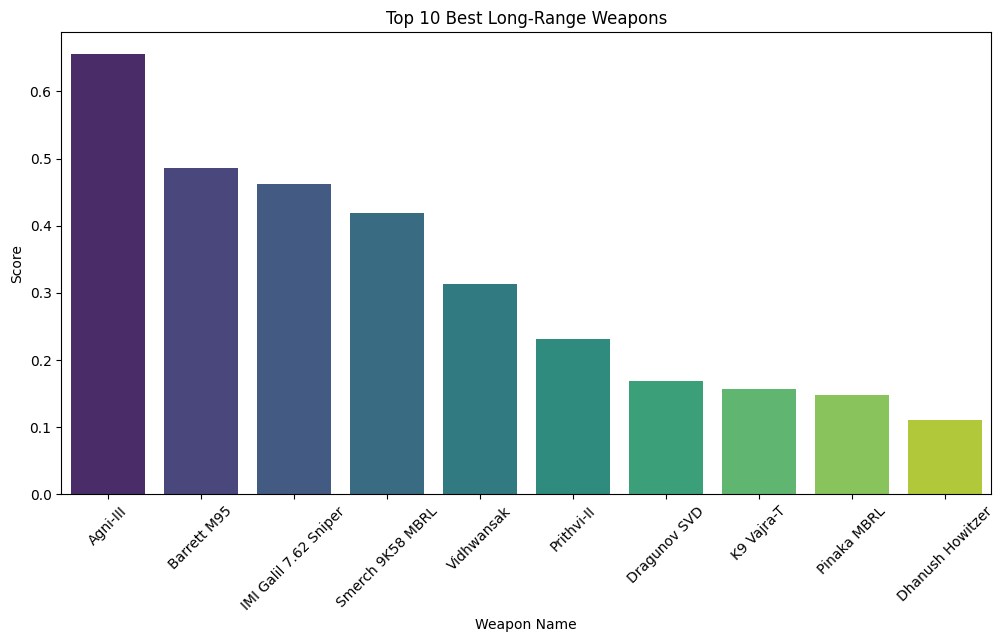

In [64]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted.head(10), x="Weapon Name", y="Score", palette="viridis")  
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Weapon Name")
plt.ylabel("Score")
plt.title("Top 10 Best Long-Range Weapons")
plt.show()

# Using ML Algorithm (Random Forest Regressor)


MAE: 0.038594173657595016, R2 Score: 0.8874269202348576
Top 5 Best Long-Range Weapons:
             Weapon Name                      Type  Predicted Score
2               Agni-III         Ballistic Missile         0.558731
7  IMI Galil 7.62 Sniper              Sniper Rifle         0.401172
1       Smerch 9K58 MBRL  Multiple Rocket Launcher         0.387701
8            Barrett M95       Anti-Material Rifle         0.349690
9             Vidhwansak       Anti-Material Rifle         0.318864


C:\Users\jagda\AppData\Local\Temp\ipykernel_6444\1773728420.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted["Weapon Name"].head(10), y=df_sorted["Predicted Score"].head(10), palette="viridis")


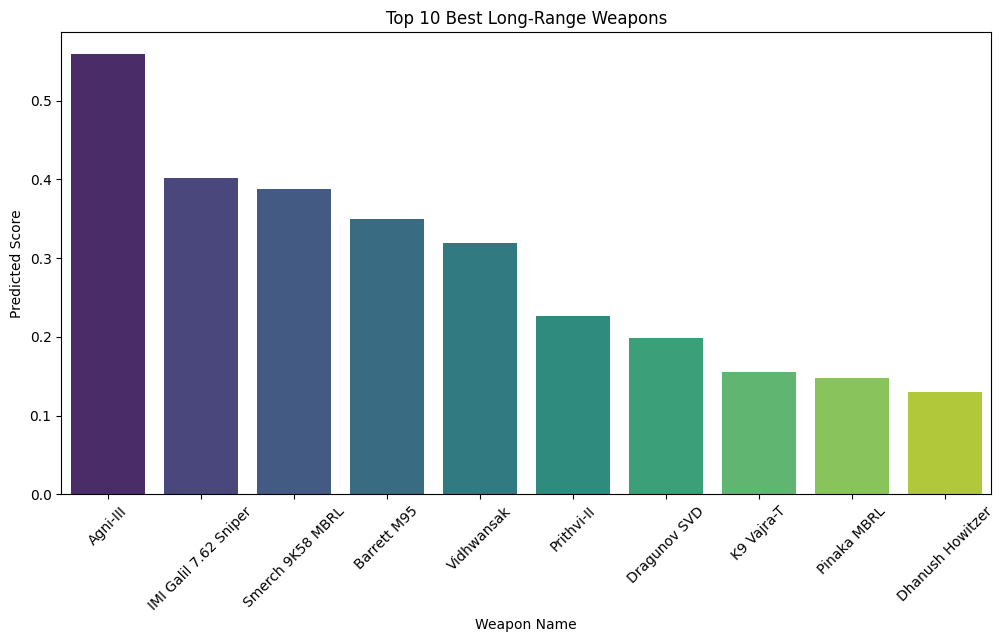

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("indian_army_long_range_weapons.csv")

# Convert numerical columns
features = ["Effective Range", "Accuracy", "Fire Rate", "Penetration Power", "Weight"]
df["Weight"] = df["Weight"].str.replace("[ ,kgtons]", "", regex=True).astype(float)
df["Effective Range"] = df["Effective Range"].str.replace("[ ,kmm]", "", regex=True).astype(float)

# Adding dummy values for missing features
np.random.seed(42)
df["Accuracy"] = np.random.uniform(50, 100, len(df))
df["Fire Rate"] = np.random.uniform(1, 10, len(df))
df["Penetration Power"] = np.random.uniform(500, 2000, len(df))

# Normalize data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Define target variable (Assumed manual scores for training)
df["Score"] = (df_scaled["Effective Range"] * 0.4 +
                df_scaled["Accuracy"] * 0.2 +
                df_scaled["Fire Rate"] * 0.2 +
                df_scaled["Penetration Power"] * 0.1 +
                df_scaled["Weight"] * -0.1)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df["Score"], test_size=0.2, random_state=42)

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict scores
df["Predicted Score"] = rf.predict(df_scaled)

# Evaluate model
mae = mean_absolute_error(df["Score"], df["Predicted Score"])
r2 = r2_score(df["Score"], df["Predicted Score"])
print(f"MAE: {mae}, R2 Score: {r2}")

# Sort and display top weapons
df_sorted = df.sort_values(by="Predicted Score", ascending=False)
print("Top 5 Best Long-Range Weapons:")
print(df_sorted[["Weapon Name", "Type", "Predicted Score"]].head())

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sorted["Weapon Name"].head(10), y=df_sorted["Predicted Score"].head(10), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Weapon Name")
plt.ylabel("Predicted Score")
plt.title("Top 10 Best Long-Range Weapons")
plt.show()